In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [2]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data -O data-week-4.csv

--2023-10-08 15:36:05--  http://wget/
Resolving wget (wget)... failed: No such host is known. .
wget: unable to resolve host address 'wget'
--2023-10-08 15:36:07--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data-week-4.csv'

     0K .......... .......... .......... .......... ..........  3%  877K 2s
    50K .......... .......... .......... .......... ..........  6% 3.69M 1s
   100K .......... .......... .......... .......... .......... 10% 1.58M 1s
   150K .......... .......... .......... .......... .......... 13% 5.52M 1s
   200K .......... .......... .......... .......... .......... 17% 1.75M 1s

In [21]:
df =  pd.read_csv('data-week-4.csv')

In [22]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [23]:
columns_to_use = [
    "Make", "Model", "Year", "Engine HP", "Engine Cylinders", 
    "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"
]
filtered_df = df[columns_to_use]
filtered_df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [24]:
filtered_df.columns = filtered_df.columns.str.replace(' ', '_').str.lower()
filtered_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [25]:
filtered_df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [26]:
filtered_df = filtered_df.fillna(0)
filtered_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [27]:
filtered_df['above_average'] = (filtered_df['msrp'] > filtered_df['msrp'].mean()).astype(int)
filtered_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [28]:
filtered_df.drop('msrp', axis=1, inplace=True)

In [29]:
# Splitting the data into features (X) and target (y)
X = filtered_df.drop('above_average', axis=1)
y = filtered_df['above_average']

# Splitting the data into train/test sets (80%/20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Splitting the temporary data into train/validation sets (75%/25% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)
X_train.shape, X_val.shape, X_test.shape

((7148, 9), (2383, 9), (2383, 9))

In [31]:
# List of numerical variables to evaluate
numerical_vars = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Dictionary to store AUC for each variable
auc_scores = {}

# Compute AUC for each numerical variable
for var in numerical_vars:
    auc = roc_auc_score(y_train, X_train[var])
    
    # If AUC is less than 0.5, negate the variable values and recompute AUC
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[var])
    
    auc_scores[var] = auc

# Find the variable with the highest AUC
max_auc_var = max(auc_scores, key=auc_scores.get)

max_auc_var, auc_scores[max_auc_var]

('engine_hp', 0.9171031265539011)

In [33]:
# Convert training and validation datasets to dictionaries for one-hot encoding
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')

# Initialize DictVectorizer and apply one-hot encoding
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)
X_val_encoded = dv.transform(val_dicts)

# Now, we'll train the logistic regression model

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Predict the probabilities on the validation set and compute AUC
y_val_pred = model.predict_proba(X_val_encoded)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

round(auc, 3)

0.979

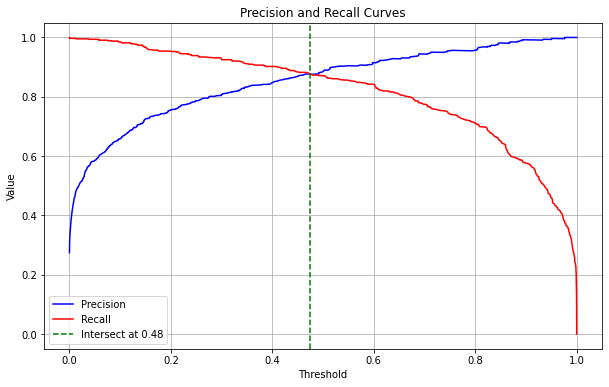

The threshold of intersection is: 0.48


In [39]:
# Compute precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred)

# Include the endpoint 1.0 for threshold
thresholds = np.append(thresholds, 1)

# Find the threshold where precision and recall intersect
intersect_threshold = thresholds[np.abs(precision - recall).argmin()]

# Plotting precision and recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision', color='blue')
plt.plot(thresholds, recall, label='Recall', color='red')
plt.axvline(x=intersect_threshold, color='green', linestyle='--', label=f'Intersect at {intersect_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall Curves')
plt.legend()
plt.grid(True)
plt.show()
print(f'The threshold of intersection is: {intersect_threshold.round(2)}')

In [41]:
# Calculate F1 scores for various thresholds
f1_scores = [f1_score(y_val, y_val_pred > threshold) for threshold in np.arange(0, 1.01, 0.01)]

# Find the threshold with the maximal F1 score
max_f1_threshold = np.arange(0, 1.01, 0.01)[np.argmax(f1_scores)]

max_f1_threshold

0.52

In [45]:

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# List to store AUC scores for each fold
auc_scores = []

# Iterate over different folds
for train_idx, val_idx in kfold.split(X_train_encoded):
    # Split the data into train and validation for the current fold
    X_train_fold, X_val_fold = X_train_encoded[train_idx], X_train_encoded[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the probabilities on the validation set and compute AUC
    y_val_fold_pred = model.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_val_fold_pred)
    auc_scores.append(auc)

# Compute the standard deviation of the AUC scores across different folds
std_dev_auc = np.std(auc_scores)

print(f'The standard devidation of the scores across different folds is: {std_dev_auc.round(4)}')

The standard devidation of the scores across different folds is: 0.0037


In [46]:
# List of C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Dictionary to store mean and std of AUC scores for each C value
scores_dict = {}

# Iterate over C values
for C in C_values:
    auc_scores = []
    
    # 5-Fold CV for each C value
    for train_idx, val_idx in kfold.split(X_train_encoded):
        X_train_fold, X_val_fold = X_train_encoded[train_idx], X_train_encoded[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model with current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_fold, y_train_fold)
        
        # Compute AUC on validation set for current fold
        y_val_fold_pred = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_val_fold_pred)
        auc_scores.append(auc)
    
    # Store mean and std of AUC scores for current C value
    scores_dict[C] = {
        'mean_auc': np.mean(auc_scores),
        'std_auc': np.std(auc_scores)
    }

# Find the C value with the best mean AUC score
best_C = max(scores_dict, key=lambda x: (scores_dict[x]['mean_auc'], -scores_dict[x]['std_auc']))

best_C, round(scores_dict[best_C]['mean_auc'], 3), round(scores_dict[best_C]['std_auc'], 3)

(10, 0.983, 0.003)